Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data


### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.layers import Input, Add,Dropout, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
from glob import glob
import warnings
warnings.filterwarnings("ignore")

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [2]:
data_dir_train = pathlib.Path("C:/Users/harsh/Downloads/pgdai/cnn/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('C:/Users/harsh/Downloads/pgdai/cnn/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [3]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

### Create a dataset

Define some parameters for the loader:

In [4]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [5]:
# train dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                               image_size=(img_height, img_width),
                                                               seed=123,
                                                               validation_split = 0.2,
                                                               subset = 'training',
                                                               batch_size=batch_size)

Found 2739 files belonging to 9 classes.
Using 2192 files for training.


In [6]:
# validation dataset
val_ds =  tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, 
                                                              image_size=(img_height, img_width),
                                                              seed=123,
                                                              validation_split = 0.2,
                                                              subset = 'validation',
                                                              batch_size=batch_size)

Found 2739 files belonging to 9 classes.
Using 547 files for validation.


In [7]:
# List out all the classes of skin cancer and store them in a list. 
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data

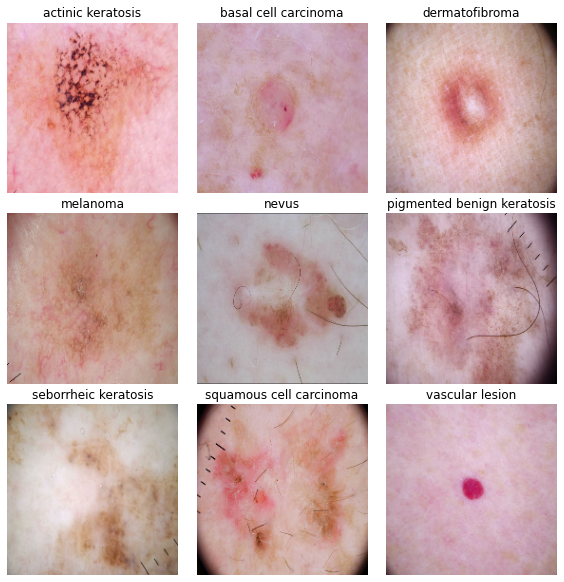

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,8))
for i in range(len(class_names)):
    filtered_ds = train_ds.filter(tf.autograph.experimental.do_not_convert(lambda x, l: tf.math.equal(l[0], i)))
    for image, label in filtered_ds.take(1):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image[0].numpy().astype('uint8'))
        plt.title(class_names[label.numpy()[0]])
        plt.axis('off')
plt.tight_layout(pad = 0.4) 
plt.show()


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# MODEL 1

### Create the model

In [22]:
model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(Conv2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(len(class_names)))
model.add(Activation('softmax'))

### Compile the model

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
activation_10 (Activation)   (None, 180, 180, 16)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 88, 88, 32)        4640      
_________________________________________________________________
activation_11 (Activation)   (None, 88, 88, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 44, 44, 32)       

### Train the model

In [25]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
69/69 [==============================] - 2s 33ms/step - loss: 2.0282 - accuracy: 0.2495 - val_loss: 1.7314 - val_accuracy: 0.3784
Epoch 2/20
69/69 [==============================] - 2s 30ms/step - loss: 1.6792 - accuracy: 0.3878 - val_loss: 1.5622 - val_accuracy: 0.4351
Epoch 3/20
69/69 [==============================] - 2s 30ms/step - loss: 1.5015 - accuracy: 0.4681 - val_loss: 1.3454 - val_accuracy: 0.5448
Epoch 4/20
69/69 [==============================] - 2s 30ms/step - loss: 1.3327 - accuracy: 0.5365 - val_loss: 1.3396 - val_accuracy: 0.5466
Epoch 5/20
69/69 [==============================] - 2s 30ms/step - loss: 1.2308 - accuracy: 0.5689 - val_loss: 1.3169 - val_accuracy: 0.5667
Epoch 6/20
69/69 [==============================] - 2s 30ms/step - loss: 1.1774 - accuracy: 0.5908 - val_loss: 1.2468 - val_accuracy: 0.5941
Epoch 7/20
69/69 [==============================] - 2s 30ms/step - loss: 1.0589 - accuracy: 0.6250 - val_loss: 1.3034 - val_accuracy: 0.5576
Epoch 8/20
69

### Visualizing training results

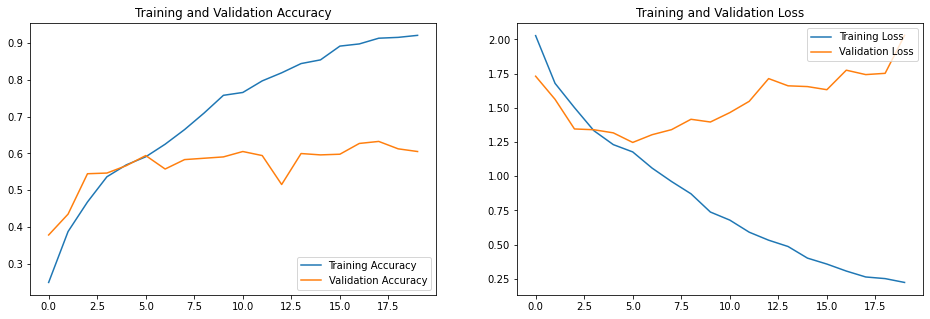

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [27]:
model.evaluate(val_ds)

18/18 [==============================] - 0s 22ms/step - loss: 2.0302 - accuracy: 0.6051


[2.030247211456299, 0.6051188111305237]

### Findings

1. Model is highly overfitting.
2. Training accuracy : 92%
3. Validation accuracy : 60%

# MODEL 2

### Adding Augmentation and Dropout layer

In [28]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

### Visualize Augmentated images

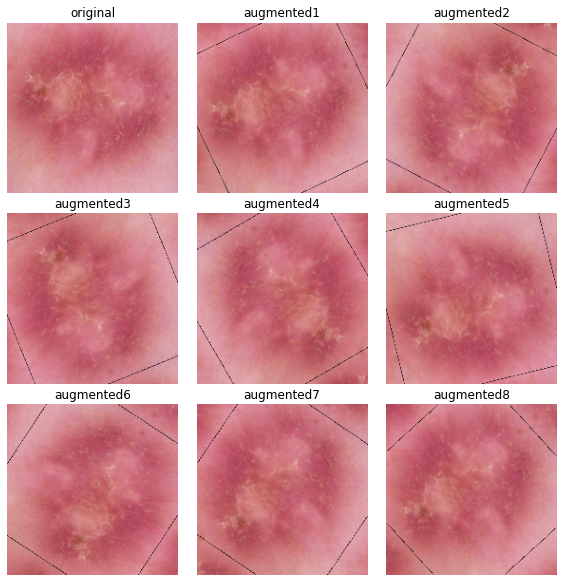

In [29]:
fig = plt.figure(figsize = (8,8))
for img, label in train_ds.take(1):
    ax = plt.subplot(3, 3, 1)
    plt.imshow(img[0].numpy().astype('uint8'))
    plt.title("original")
    plt.axis('off')
    for i in range(8):
        aug_img = data_augmentation(img)
        ax = plt.subplot(3, 3, i+2)
        plt.imshow(aug_img[0].numpy().astype('uint8'))
        plt.title("augmented{c}".format(c = i+1))
        plt.axis('off')
plt.tight_layout(pad = 0.4) 
plt.show()
   

### Create the model

In [30]:
model2 = Sequential()
model2.add(Input(shape = (img_height, img_width, 3)))
model2.add(data_augmentation)
model2.add(layers.experimental.preprocessing.Rescaling(1./255))
model2.add(Conv2D(16, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.1))

model2.add(Conv2D(32, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.1))

model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.1))

model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dropout(0.25))
model2.add(Dense(len(class_names)))
model2.add(Activation('softmax'))

### Compile the model

In [31]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [32]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_3 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
activation_15 (Activation)   (None, 180, 180, 16)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 88, 88, 32)       

### Training the model

In [33]:
epochs = 20
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
69/69 [==============================] - 3s 37ms/step - loss: 2.0534 - accuracy: 0.2322 - val_loss: 1.9406 - val_accuracy: 0.2815
Epoch 2/20
69/69 [==============================] - 2s 35ms/step - loss: 1.8182 - accuracy: 0.3371 - val_loss: 1.6465 - val_accuracy: 0.4607
Epoch 3/20
69/69 [==============================] - 2s 36ms/step - loss: 1.6702 - accuracy: 0.4065 - val_loss: 1.5264 - val_accuracy: 0.4497
Epoch 4/20
69/69 [==============================] - 2s 36ms/step - loss: 1.5471 - accuracy: 0.4516 - val_loss: 1.4396 - val_accuracy: 0.5320
Epoch 5/20
69/69 [==============================] - 2s 36ms/step - loss: 1.4856 - accuracy: 0.4986 - val_loss: 1.3808 - val_accuracy: 0.5411
Epoch 6/20
69/69 [==============================] - 3s 36ms/step - loss: 1.4730 - accuracy: 0.4932 - val_loss: 1.4716 - val_accuracy: 0.4991
Epoch 7/20
69/69 [==============================] - 2s 36ms/step - loss: 1.4143 - accuracy: 0.5050 - val_loss: 1.3347 - val_accuracy: 0.5375
Epoch 8/20
69

### Visualizing the results

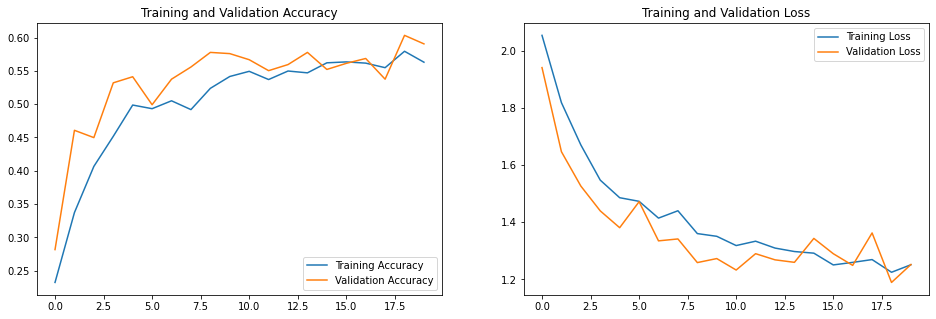

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [35]:
model2.evaluate(val_ds)

18/18 [==============================] - 0s 22ms/step - loss: 1.2520 - accuracy: 0.5905


[1.2520185708999634, 0.5904936194419861]

### Analysis

1. Overfitting was reduced significantly. Underfitting of data is present. 
2. Training accuracy: 57%
3. Validation accuracy: 59%

#### Distribution of classes in the training dataset.


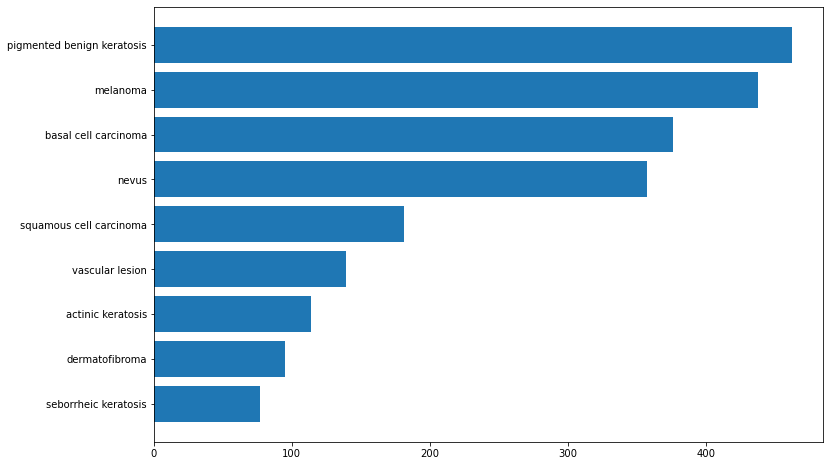

In [36]:
count = {}

for i in class_names:
    count[i] = len(list(data_dir_train.glob(f'{i}/*.jpg')))

count = dict(sorted(count.items(), key=lambda x: x[1]))

count_list = list(count.items())
x, y = zip(*count_list)

plt.figure(figsize=(12, 8))
plt.barh(x, y)
plt.show()

#### - Which class has the least number of samples?

Seborrheic Keratosis has the least number of sample

#### - Which classes dominate the data in terms proportionate number of samples?

Pigmented Benign Keratosis dominates the data in terms of proportionate number of samples.

In [37]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
path_list

['C:\\Users\\harsh\\Downloads\\pgdai\\cnn\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025780.jpg',
 'C:\\Users\\harsh\\Downloads\\pgdai\\cnn\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025803.jpg',
 'C:\\Users\\harsh\\Downloads\\pgdai\\cnn\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025825.jpg',
 'C:\\Users\\harsh\\Downloads\\pgdai\\cnn\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025953.jpg',
 'C:\\Users\\harsh\\Downloads\\pgdai\\cnn\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025957.jpg',
 'C:\\Users\\harsh\\Downloads\\pgdai\\cnn\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025992.jpg'

In [38]:
lesion_list = [os.path.basename((os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [39]:
dataframe_dict = dict(zip(path_list, lesion_list))

In [40]:
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])

# MODEL 3

#### Rectify the class imbalance

In [41]:
!pip install Augmentor

In [42]:
path_to_training_dataset = "C:/Users/harsh/Downloads/pgdai/cnn/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x204C99B4A30>:   0%| | 2/500 [00:00<00:19, 25.31 Samples/s]

Initialised with 114 image(s) found.
Output directory set to C:/Users/harsh/Downloads/pgdai/cnn/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x204D78D7F10>: 100%|█| 500/500 [00:02<00:00, 230.13 Samples
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x204C99A37F0>:   4%| | 18/500 [00:00<00:04, 99.50 Samples/s

Initialised with 376 image(s) found.
Output directory set to C:/Users/harsh/Downloads/pgdai/cnn/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x204D7701A00>: 100%|█| 500/500 [00:02<00:
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x204D7879DC0>:   4%| | 21/500 [00:00<00:08, 59.48 Samples/s

Initialised with 95 image(s) found.
Output directory set to C:/Users/harsh/Downloads/pgdai/cnn/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x204D78467C0>: 100%|█| 500/500 [00:02<00:00, 226.24 Samples
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x204D7701250>:   0%| | 1/500 [00:00<01:0

Initialised with 438 image(s) found.
Output directory set to C:/Users/harsh/Downloads/pgdai/cnn/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x204D7899130>: 100%|█| 500/500 [00:13<00:00, 38.24 Samples
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to C:/Users/harsh/Downloads/pgdai/cnn/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x204D7836B80>: 100%|█| 500/500 [00:10<00:00, 48.65 Samples/
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to C:/Users/harsh/Downloads/pgdai/cnn/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x204C3A56CD0>: 100%|█| 500/500 [00:02<00:00, 202.04 Samples
Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x204D7836D30>:   0%| | 1/500 [00:00<01:19,  6.32 Samples/s

Initialised with 77 image(s) found.
Output directory set to C:/Users/harsh/Downloads/pgdai/cnn/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x204C991F400>: 100%|█| 500/500 [00:05<00
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x204D788BDC0>:   5%| | 23/500 [00:00<00:48,  9.80 Samples/s

Initialised with 181 image(s) found.
Output directory set to C:/Users/harsh/Downloads/pgdai/cnn/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2045C174850>: 100%|█| 500/500 [00:02<00:00, 181.93 Samples
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x204D78C0310>:   3%| | 14/500 [00:00<00:07, 65.42 Samples/s

Initialised with 139 image(s) found.
Output directory set to C:/Users/harsh/Downloads/pgdai/cnn/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x204D786C070>: 100%|█| 500/500 [00:02<00:00, 180.20 Samples


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [43]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

5000


### Lets see the distribution of augmented data after adding new images to the original training data.

In [44]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['C:\\Users\\harsh\\Downloads\\pgdai\\cnn\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_01f0c96e-af77-4409-b68b-2419b8266db2.jpg',
 'C:\\Users\\harsh\\Downloads\\pgdai\\cnn\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_7540e92a-e39f-4ae6-a800-8d5379738b8a.jpg',
 'C:\\Users\\harsh\\Downloads\\pgdai\\cnn\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_b3313bc4-a416-4784-af51-6d3c97caed53.jpg',
 'C:\\Users\\harsh\\Downloads\\pgdai\\cnn\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_c2f6a414-15eb-43ea-ba53-eba309a17c9f.jpg',
 'C:\\Users\\harsh\\Download

In [45]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [46]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [47]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [48]:
new_df['Label'].value_counts()

actinic keratosis             1114
pigmented benign keratosis     962
melanoma                       938
basal cell carcinoma           876
nevus                          857
squamous cell carcinoma        681
vascular lesion                639
dermatofibroma                 595
seborrheic keratosis           577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### Train the model on the data created using Augmentor

In [49]:
batch_size = 32
img_height = 180
img_width = 180

#### Create a training dataset

In [50]:
data_dir_train="C:/Users/harsh/Downloads/pgdai/cnn/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7239 files belonging to 9 classes.
Using 5792 files for training.


#### Create a validation dataset

In [51]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7239 files belonging to 9 classes.
Using 1447 files for validation.


### Create the model

In [56]:
model3 = Sequential()
model3.add(Input(shape = (img_height, img_width, 3)))
model3.add(layers.experimental.preprocessing.Rescaling(1./255))
model3.add(Conv2D(16, (3, 3), padding='same'))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.1))

model3.add(Conv2D(32, (3, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.1))

model3.add(Conv2D(64, (3, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.1))

model3.add(Flatten())
model3.add(Dense(128))
model3.add(Activation('relu'))
model3.add(Dropout(0.25))
model3.add(Dense(len(class_names)))
model3.add(Activation('softmax'))

### Compile the model

In [57]:
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [58]:
model3.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_5 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
activation_25 (Activation)   (None, 180, 180, 16)      0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 88, 88, 32)        4640      
_________________________________________________________________
activation_26 (Activation)   (None, 88, 88, 32)       

### Training model

In [59]:
epochs = 40
history = model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/40
181/181 [==============================] - 28s 157ms/step - loss: 2.0334 - accuracy: 0.2453 - val_loss: 1.7438 - val_accuracy: 0.3587
Epoch 2/40
181/181 [==============================] - 29s 158ms/step - loss: 1.5551 - accuracy: 0.4109 - val_loss: 1.5109 - val_accuracy: 0.4381
Epoch 3/40
181/181 [==============================] - 28s 154ms/step - loss: 1.4013 - accuracy: 0.4741 - val_loss: 1.2519 - val_accuracy: 0.5439
Epoch 4/40
181/181 [==============================] - 28s 155ms/step - loss: 1.2815 - accuracy: 0.5171 - val_loss: 1.1542 - val_accuracy: 0.5681
Epoch 5/40
181/181 [==============================] - 28s 157ms/step - loss: 1.1422 - accuracy: 0.5703 - val_loss: 1.0518 - val_accuracy: 0.6303
Epoch 6/40
181/181 [==============================] - 28s 155ms/step - loss: 1.0632 - accuracy: 0.5956 - val_loss: 0.9411 - val_accuracy: 0.6565
Epoch 7/40
181/181 [==============================] - 28s 156ms/step - loss: 0.9642 - accuracy: 0.6359 - val_loss: 0.8902 - val_ac

#### Visualize the model results

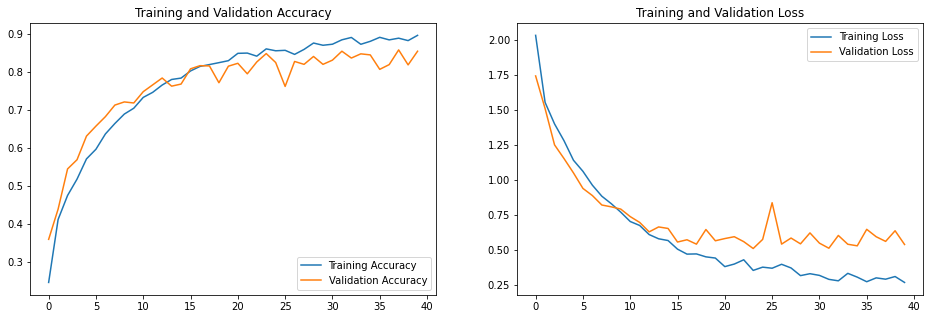

In [60]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [61]:
model3.evaluate(val_ds)

46/46 [==============================] - 5s 114ms/step - loss: 0.5410 - accuracy: 0.8535


[0.5409511923789978, 0.8534899950027466]

#### Analysis



1. The model accuracy has improved significantly.
2. Training accuracy: 89%
3. Validation accuracy: 85%
4. Accuracy has jumped from 52% to 84%, this confirms that class rebalance helped in dealing with the underfitting that was present after using dropouts to deal with overfitting.